In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/wine-data/wine_data.csv', header = None, usecols=[0,1,2])
data.columns=['Class label', 'Alcohol', 'Malic acid']

In [3]:
data.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


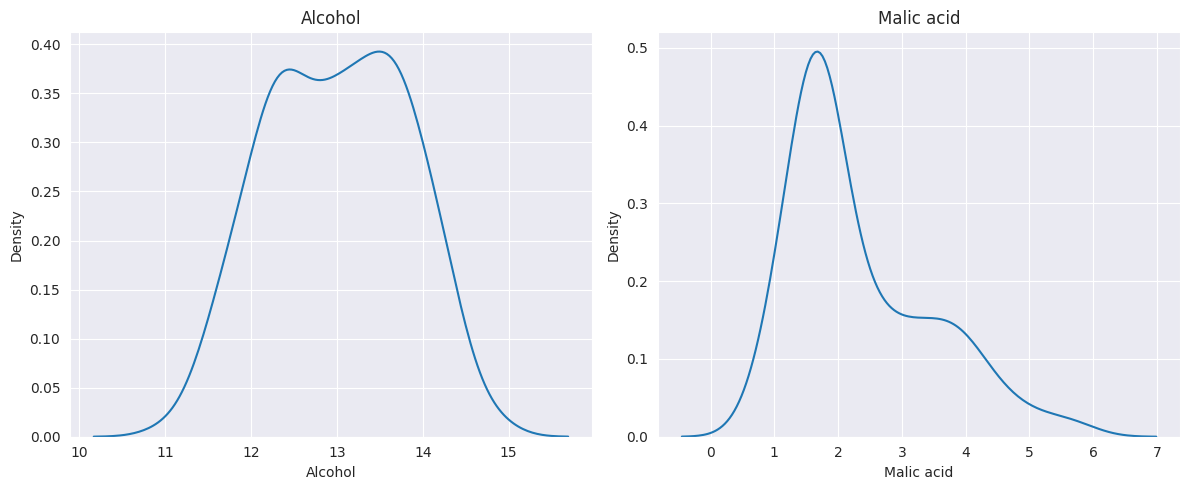

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
sns.set_style('whitegrid')
ax1.set_title('Alcohol')
sns.kdeplot(data['Alcohol'], ax=ax1)

ax2.set_title('Malic acid')
sns.kdeplot(data['Malic acid'], ax=ax2)
plt.tight_layout()
plt.show()

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

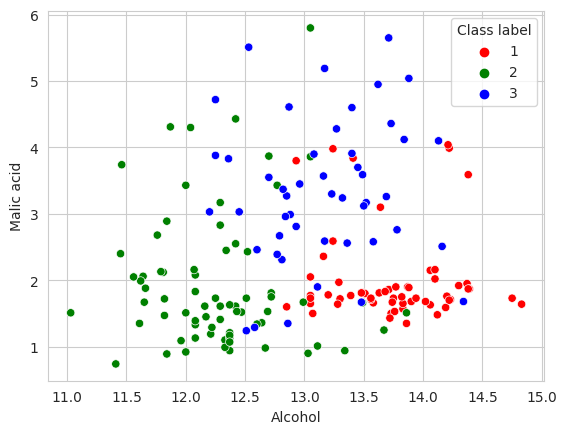

In [16]:
dict_c = {1:'red', 2:'green', 3:'blue'}
sns.scatterplot(data = data, x = 'Alcohol', y = 'Malic acid', hue = 'Class label', palette = dict_c)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('Class label', axis = 1),
                                                    data['Class label'],
                                                    test_size=0.3,
                                                    random_state=13
                                                   )

In [21]:
# print the shapes
print('x_train shape', x_train.shape)
print('x_test shape', x_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

x_train shape (124, 2)
x_test shape (54, 2)
y_train shape (124,)
y_test shape (54,)


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [25]:
np.round(x_train.describe(),2)

,Alcohol,Malic acid
count,124.00,124.00
mean,13.02,2.37
std,0.82,1.11
min,11.03,0.74
25%,12.37,1.66
50%,13.05,1.91
75%,13.68,3.03
max,14.75,5.80


In [26]:
np.round(x_train_scaled.describe(),2)

,Alcohol,Malic acid
count,124.00,124.00
mean,0.53,0.32
std,0.22,0.22
min,0.00,0.00
25%,0.36,0.18
50%,0.54,0.23
75%,0.71,0.45
max,1.00,1.00


Text(0.5, 1.0, 'After Scaling')

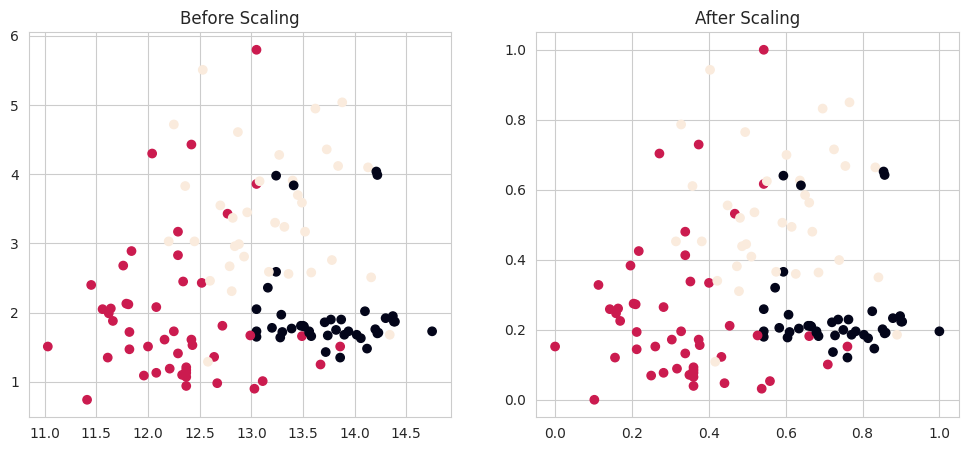

In [29]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Alcohol'], x_train['Malic acid'], c = y_train)
ax1.set_title('Before Scaling')

ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic acid'], c = y_train)
ax2.set_title('After Scaling')

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

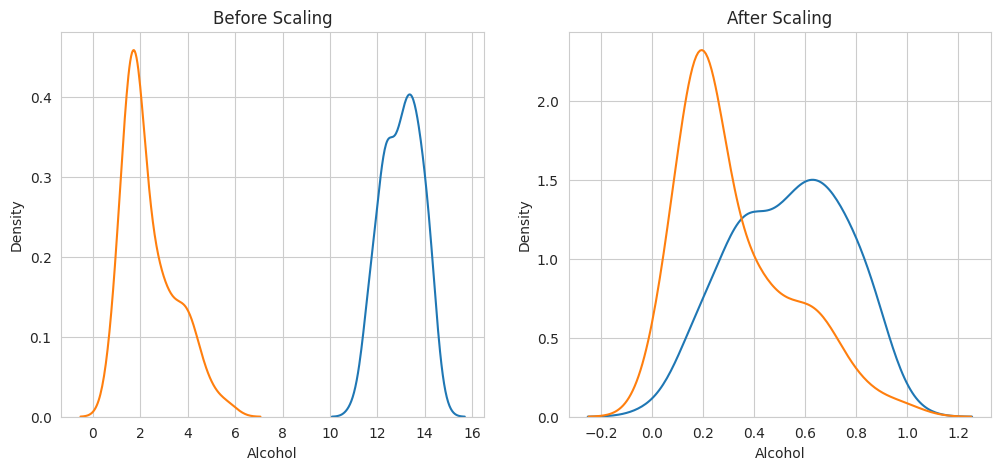

In [33]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic acid'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)

<Axes: title={'center': 'Alcohol Distribution After Scaling'}, xlabel='Alcohol', ylabel='Density'>

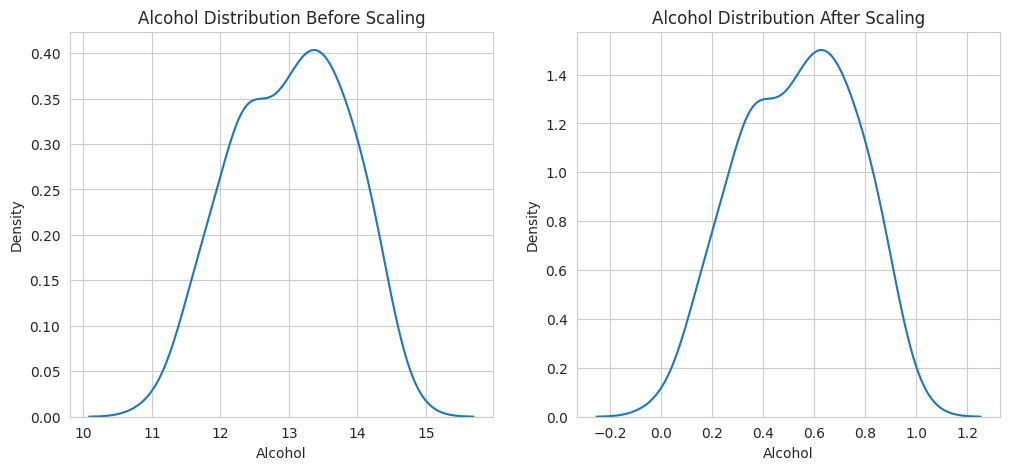

In [37]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)


ax2.set_title('Alcohol Distribution After Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)

<Axes: title={'center': 'Malic acid After Scaling'}, xlabel='Malic acid', ylabel='Density'>

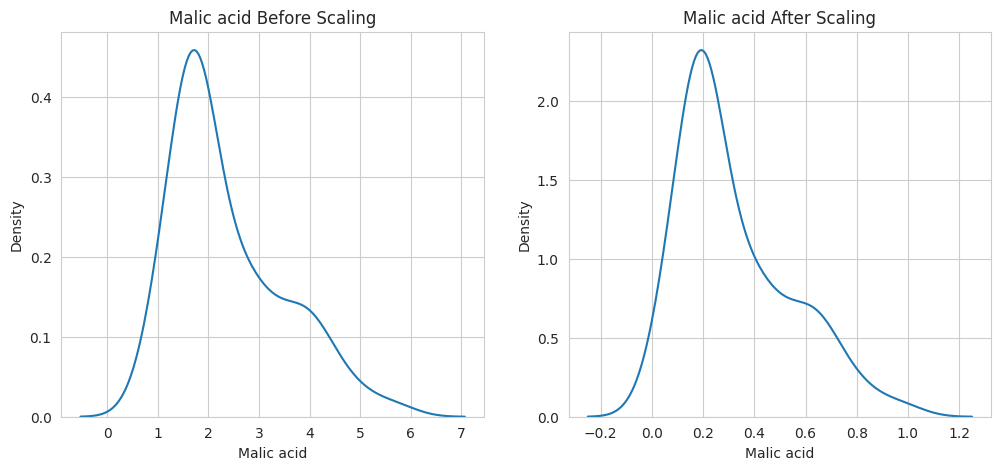

In [38]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Malic acid Before Scaling')
sns.kdeplot(x_train['Malic acid'], ax=ax1)


ax2.set_title('Malic acid After Scaling')
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)